In [41]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
#import data
data = pd.read_csv("./data/combined_data_1.txt", header = None, names = ['cust_id', 'rating', 'date'])

In [54]:
print("full dataset:" + str(data.shape))
# To build cleaning logic, take the first 100,000 rows (0.5%)
df = data[:10000]
print("for cleaning logic purposes: " + str(df.shape))

full dataset:(24058263, 3)
for cleaning logic purposes: (10000, 3)


In [63]:
# Iterate and fill a list of python dicts. At end of loop, 
# put dict list in another pandas df. Want to look into more efficient method, but for now this'll do.

df_clean = pd.DataFrame({'cust_id' : [], 'movie_id' : [], 'rating' : []})
movie_id = -1
append_dict = {}
append_matrix = []
for row in df.itertuples():
    if(math.isnan(row[2])):
        movie_id = row[1][:-1]
        continue
    else:
        append_dict["cust_id"] = float(row[1])
        append_dict["movie_id"] = float(movie_id)
        append_dict["rating"] = float(row[2])
        append_matrix.append(append_dict.copy())

df_clean = df_clean.append(append_matrix,ignore_index=True)    

In [64]:
print(df_clean.head(10))

     cust_id  movie_id  rating
0  1488844.0       1.0     3.0
1   822109.0       1.0     5.0
2   885013.0       1.0     4.0
3    30878.0       1.0     4.0
4   823519.0       1.0     3.0
5   893988.0       1.0     3.0
6   124105.0       1.0     4.0
7  1248029.0       1.0     3.0
8  1842128.0       1.0     4.0
9  2238063.0       1.0     3.0


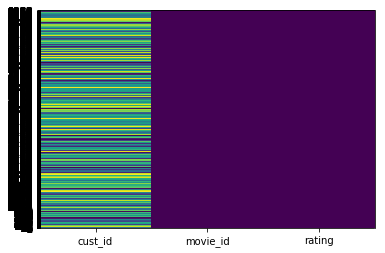

In [65]:
plt.pcolormesh(df_clean)
plt.yticks(np.arange(0.5, len(df_clean.index), 1), df_clean.index)
plt.xticks(np.arange(0.5, len(df_clean.columns), 1), df_clean.columns)
plt.show()